In [1]:
import igl
import scipy as sp
import numpy as np
from meshplot import plot, subplot, interact

import os
root_folder = os.getcwd()
#root_folder = os.path.join(os.getcwd(), "tutorial")

In [2]:
v, f = igl.read_triangle_mesh(os.path.join(root_folder, "data", "bunny.obj"))
#import matplotlib.pyplot as plt
## Select a vertex from which the distances should be calculated
vs = np.array([0])
##All vertices are the targets
vt = np.arange(v.shape[0])
from tvtk.api import tvtk
from tvtkfunc import ivtk_scene
import matplotlib.pyplot as plt
d = igl.exact_geodesic(v, f, vs, vt)#, fs, ft)
print("v,vs vt d: ", v.shape,vs,vt.shape, d.shape)
strip_size = 0.1
##The function should be 1 on each integer coordinate
c = np.abs(np.sin((d / strip_size * np.pi)))
#plot(v, f, c, shading={"wireframe": True})
heat=igl.heat_geodesic(v, f,1.0, vs)
print("heat: ", heat.shape)
plot(v,f,heat/strip_size * np.pi, shading={"wireframe": False})
#c = plt.contour(v[:,0],v[:,1],v[:,2],heat,8,colors='black')

********************************************************************************
         to build the TVTK classes (8.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************

v,vs vt d:  (2503, 3) [0] (2503,) (2503,)
heat:  (2503,)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016800…

In [3]:
from tvtk.tools import tvtk_doc
#tvtk_doc.main()

In [4]:
import pyvista as pv
from pyvista import examples

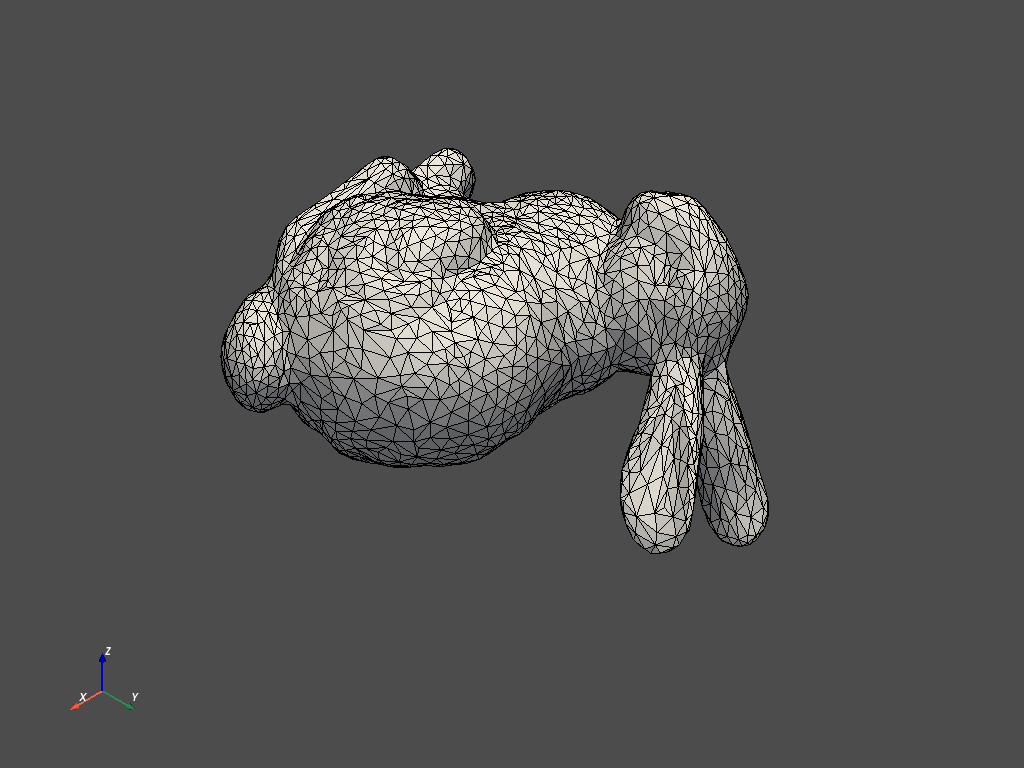

In [13]:
# sphinx_gallery_thumbnail_number = 1
import pyvista as pv
from pyvista import examples

# Load a global topography surface and decimate it
bunny=pv.read(os.path.join(root_folder, "data", "bunny.obj"))
cpos = bunny.plot(show_edges=True)
#land = examples.download_topo_land().triangulate().decimate(0.98)
#print("land: ", land.shape)

In [11]:
plotter = pv.Plotter(off_screen=True)
plotter.add_mesh(bunny)
#plotter.show(screenshot="myscreenshot.png")

(vtkRenderingOpenGL2Python.vtkOpenGLActor)000001D41E17B348

In [6]:
print(bunny)
bunny.points

PolyData (0x1d41e126d08)
  N Cells:	4968
  N Points:	2503
  X Bounds:	-9.438e-02, 6.078e-02
  Y Bounds:	3.331e-02, 1.870e-01
  Z Bounds:	-6.168e-02, 5.871e-02
  N Arrays:	0



pyvista_ndarray([[-0.00341018,  0.13031957,  0.02175437],
                 [-0.08171916,  0.15250145,  0.02965609],
                 [-0.03054348,  0.12477885,  0.00109834],
                 ...,
                 [-0.01389549,  0.16787168, -0.02189723],
                 [-0.069413  ,  0.15121847, -0.04453854],
                 [-0.0550398 ,  0.0573097 ,  0.0169909 ]], dtype=float32)

In [14]:
#start=bunny.points([0])
print(bunny)
start=1
end=10
#start=bunny.find_closest_point((-0.00341018,  0.13031957,  0.02175437))
#end=bunny.find_closest_point((-0.03054348,  0.12477885,  0.00109834))
a = bunny.geodesic(start,end)

PolyData (0x1d4214ea648)
  N Cells:	4968
  N Points:	2503
  X Bounds:	-9.438e-02, 6.078e-02
  Y Bounds:	3.331e-02, 1.870e-01
  Z Bounds:	-6.168e-02, 5.871e-02
  N Arrays:	0



In [17]:
p = pv.Plotter(notebook=0)
p.add_mesh(a, line_width=10, color="red", label="Geodesic Path")
p.add_mesh(bunny, show_edges=True)
p.add_legend()
#p.camera_position = [(3.5839785524183934, 2.3915238111304924, 1.3993738227478327),
# (-0.06842917033182638, 0.15467201157962263, -0.07331693636555875),
# (-0.34851770951584765, -0.04724188391065845, 0.9361108965066047)]

p.show()
#p.show(screenshot="myscreenshot2.png")

[(0.2613421674261341, 0.38829593503871057, 0.2766607138703117),
 (-0.016800811514258385, 0.1101529560983181, -0.0014822650700807571),
 (0.0, 0.0, 1.0)]

In [ ]:
print(land)
cape_town = land.find_closest_point((0.790801, 0.264598, -0.551942))
dubai = land.find_closest_point((0.512642, 0.745898, 0.425255))
bangkok = land.find_closest_point((-0.177077, 0.955419, 0.236273))
rome = land.find_closest_point((0.718047, 0.163038, 0.676684))

a = land.geodesic(cape_town, dubai)
b = land.geodesic(cape_town, bangkok)
c = land.geodesic(cape_town, rome)

In [ ]:
p = pv.Plotter(notebook=0)
p.add_mesh(a+b+c, line_width=10, color="red", label="Geodesic Path")
p.add_mesh(land, show_edges=True)
p.add_legend()
p.camera_position = [(3.5839785524183934, 2.3915238111304924, 1.3993738227478327),
 (-0.06842917033182638, 0.15467201157962263, -0.07331693636555875),
 (-0.34851770951584765, -0.04724188391065845, 0.9361108965066047)]

p.show()